In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

train = pd.read_table("train.csv", sep = ",")
train['station_id'] = train['station_id'].astype(str) # station_id をダミー変数化するため，あえてstrに変換している

In [2]:
print(train.shape)
train.head()

(1033200, 18)


,Unnamed: 0,id,year,month,day,hour,station_id,bikes_available_x,predict,day_name,hol_dum,temp,rain,datet_x,datet_y,bikes_available_y,datet_y.1,bikes_available_y.1
0,0,0,2013,9,1,0,0,11.0,0,Sunday,0,70,0,2013-09-01 00:00:00,2013-08-31 00:00:00,14.015884,2013-08-25 00:00:00,13.540189
1,1,1,2013,9,1,1,0,11.0,0,Sunday,0,70,0,2013-09-01 01:00:00,2013-08-31 01:00:00,14.015884,2013-08-25 01:00:00,13.540189
2,2,2,2013,9,1,2,0,11.0,0,Sunday,0,70,0,2013-09-01 02:00:00,2013-08-31 02:00:00,14.015884,2013-08-25 02:00:00,13.540189
3,3,3,2013,9,1,3,0,11.0,0,Sunday,0,70,0,2013-09-01 03:00:00,2013-08-31 03:00:00,14.015884,2013-08-25 03:00:00,13.540189
4,4,4,2013,9,1,4,0,11.0,0,Sunday,0,70,0,2013-09-01 04:00:00,2013-08-31 04:00:00,14.015884,2013-08-25 04:00:00,13.540189


### station_idによって曜日の影響が異なる（住宅地，商業地などの違い？）

<AxesSubplot:xlabel='day_name', ylabel='bikes_available_x'>

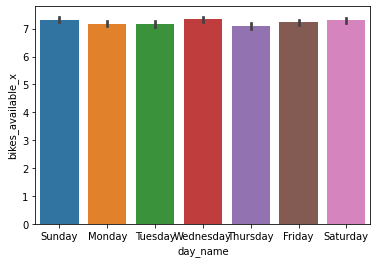

In [3]:
sns.barplot(x = "day_name", y = "bikes_available_x", data = train[train['station_id'] == '18'])

<AxesSubplot:xlabel='hol_dum', ylabel='bikes_available_x'>

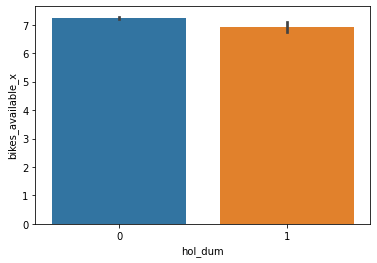

In [4]:
sns.barplot(x = "hol_dum", y = "bikes_available_x", data = train[train['station_id'] == '18'])

<AxesSubplot:xlabel='day_name', ylabel='bikes_available_x'>

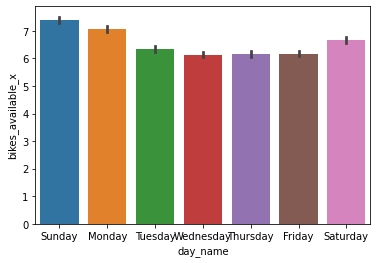

In [5]:
sns.barplot(x = "day_name", y = "bikes_available_x", data = train[train['station_id'] == '8'])

<AxesSubplot:xlabel='hol_dum', ylabel='bikes_available_x'>

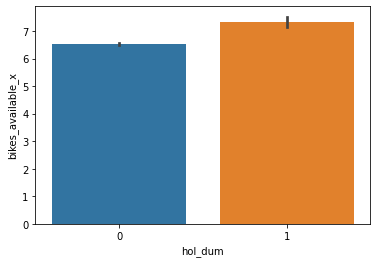

In [6]:
sns.barplot(x = "hol_dum", y = "bikes_available_x", data = train[train['station_id'] == '8'])

<AxesSubplot:xlabel='hour', ylabel='bikes_available_x'>

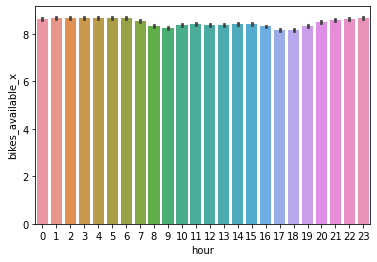

In [7]:
sns.barplot(x = "hour", y = "bikes_available_x", data = train)

<AxesSubplot:xlabel='night', ylabel='bikes_available_x'>

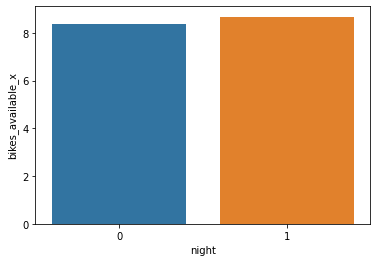

In [8]:
# 2200 - 0600 のダミー変数をつくる．

def night_dum(s):
    if (s >= 22) or (s <= 6): 
        return 1
    else:
        return 0

train['night'] = train['hour'].apply(night_dum)

sns.barplot(x = "night", y = "bikes_available_x", data = train)

In [9]:
# Validation Set: 今回は適当に2014 8/24 - 2014 8/31

import datetime as dt

val_in      = (dt.datetime(2014,8,24) <= pd.to_datetime(train['datet_x']))*(pd.to_datetime(train['datet_x']) <= dt.datetime(2014,8,31))
train_val   = train[val_in == 1].drop(['datet_x', 'datet_y', 'datet_y.1'], axis=1)
train_train = train[pd.to_datetime(train['datet_x']) < dt.datetime(2014,8,24)].dropna().drop(['datet_x', 'datet_y', 'datet_y.1'], axis=1)

In [10]:
train_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578155 entries, 0 to 1027007
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           578155 non-null  int64  
 1   id                   578155 non-null  int64  
 2   year                 578155 non-null  int64  
 3   month                578155 non-null  int64  
 4   day                  578155 non-null  int64  
 5   hour                 578155 non-null  int64  
 6   station_id           578155 non-null  object 
 7   bikes_available_x    578155 non-null  float64
 8   predict              578155 non-null  int64  
 9   day_name             578155 non-null  object 
 10  hol_dum              578155 non-null  int64  
 11  temp                 578155 non-null  int64  
 12  rain                 578155 non-null  int64  
 13  bikes_available_y    578155 non-null  float64
 14  bikes_available_y.1  578155 non-null  float64
 15  night           

In [11]:
train_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11830 entries, 8568 to 1027176
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           11830 non-null  int64  
 1   id                   11830 non-null  int64  
 2   year                 11830 non-null  int64  
 3   month                11830 non-null  int64  
 4   day                  11830 non-null  int64  
 5   hour                 11830 non-null  int64  
 6   station_id           11830 non-null  object 
 7   bikes_available_x    11830 non-null  float64
 8   predict              11830 non-null  int64  
 9   day_name             11830 non-null  object 
 10  hol_dum              11830 non-null  int64  
 11  temp                 11830 non-null  int64  
 12  rain                 11830 non-null  int64  
 13  bikes_available_y    11830 non-null  float64
 14  bikes_available_y.1  11830 non-null  float64
 15  night                11830 non-

In [12]:
# ランダムフォレスト

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

Y_train = train_train.bikes_available_x
Y_test  = train_val.bikes_available_x
X_train = pd.get_dummies(train_train[['station_id', 'month', 'hour', 'night', 'day_name', 'hol_dum', 'temp', 'rain', 'bikes_available_y', 'bikes_available_y.1']]).iloc[:,:].values
X_test  = pd.get_dummies(train_val[['station_id', 'month', 'hour', 'night', 'day_name', 'hol_dum', 'temp', 'rain', 'bikes_available_y', 'bikes_available_y.1']]).iloc[:,:].values

In [13]:
def grid_search(a,b,c):
    rf  = RandomForestRegressor(criterion = 'mse', max_features = a, n_estimators = b, min_samples_leaf = c, random_state = 1)
    rf.fit(X_train, Y_train)
    Y_pred = rf.predict(X_test)
    mse_score = mean_squared_error(Y_test, Y_pred)
    print(mse_score**0.5)

In [14]:
# grid_search(5,300,5)

rf  = RandomForestRegressor(criterion = 'mse', max_features = 5, n_estimators = 300, min_samples_leaf = 5, random_state = 1)
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)
mse_score = mean_squared_error(Y_test, Y_pred)
print(mse_score**0.5)

3.014162110064201


<AxesSubplot:>

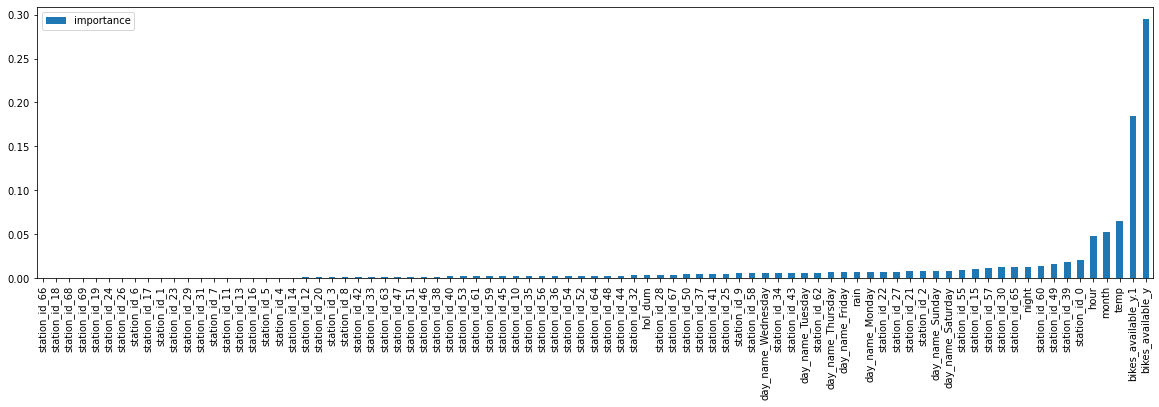

In [15]:
feats = {}
X_train = pd.get_dummies(train_train[['station_id', 'month', 'hour', 'night', 'day_name', 'hol_dum', 'temp', 'rain', 'bikes_available_y', 'bikes_available_y.1']])

for feature, importance in zip(X_train.columns, rf.feature_importances_):
    feats[feature] = importance

importances = pd.DataFrame.from_dict(feats, orient = 'index').rename(columns={0: 'importance'})
importances.sort_values(by = 'importance').plot(kind = 'bar', figsize=(20, 5))

In [16]:
# station_idごとに異なるランダムフォレストをつくる

Y_test  = train_val.bikes_available_x
Y_pred  = Y_test.copy()

Y_train = train_train.bikes_available_x[train_train.station_id == '0']
X_train = train_train[['month', 'hour', 'night', 'day_name', 'hol_dum', 'temp', 'rain', 'bikes_available_y', 'bikes_available_y.1']][train_train.station_id == '0']
X_test  = train_val[['month', 'hour', 'night', 'day_name', 'hol_dum', 'temp', 'rain', 'bikes_available_y', 'bikes_available_y.1']][train_val.station_id == '0']
X_train = pd.get_dummies(X_train).iloc[:,:].values
X_test  = pd.get_dummies(X_test).iloc[:,:].values

rf = RandomForestRegressor(criterion = 'mse', max_features = 2, n_estimators = 300, min_samples_leaf = 10, random_state = 1)
rf.fit(X_train, Y_train)
Y_pred[train_val.station_id == '0'] = rf.predict(X_test)

for i in range(1, 70):
    Y_train = train_train.bikes_available_x[train_train.station_id == str(i)]
    X_train = train_train[['month', 'hour', 'night', 'day_name', 'hol_dum', 'temp', 'rain', 'bikes_available_y', 'bikes_available_y.1']][train_train.station_id == str(i)]
    X_test  = train_val[['month', 'hour', 'night', 'day_name', 'hol_dum', 'temp', 'rain', 'bikes_available_y', 'bikes_available_y.1']][train_val.station_id == str(i)]
    X_train = pd.get_dummies(X_train).iloc[:,:].values
    X_test  = pd.get_dummies(X_test).iloc[:,:].values
    rf = RandomForestRegressor(criterion = 'mse', max_features = 2, n_estimators = 300, min_samples_leaf = 10, random_state = 1)
    rf.fit(X_train, Y_train)
    Y_pred[train_val.station_id == str(i)] = rf.predict(X_test)

In [17]:
mse_score = mean_squared_error(Y_test, Y_pred)
print(mse_score**0.5)

3.035696074725056
